In [164]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
directory = 'data'
def get_state_data(state_code): 
    ls = []
    ls_for_index = []
    for index, filename in enumerate(os.scandir(directory)):
        if filename.is_file():
            if str(filename.path).startswith(f'data\CoWIN_IN_{state_code}_2021'):
                f = open(filename.path,)
                data = json.load(f)
                ls.append(data)
                ls_for_index.append(' '.join(list(filename.path.split('\\')[1].split('.')[0].split(f'{state_code}_')[1].split('-'))))
    return ls, ls_for_index

In [173]:
def get_state_dfs(state_code):
    ls, ls_for_index = get_state_data(state_code)
    df = pd.DataFrame() 
    df['date-index'] = ls_for_index
    df['date-index'] =  pd.to_datetime(df['date-index'], format='%Y %m %d')
    df.reset_index().set_index('date-index')
    ls_total_sites = []
    for i in range(len(ls)):
        try:
            ls_total_sites.append(ls[i]['topBlock']['sites']['total'])
        except:
            ls_total_sites.append(None)
    df['total_sites'] = ls_total_sites

    ls_govt_sites = []
    for i in range(len(ls)):
        try:
            ls_govt_sites.append(ls[i]['topBlock']['sites']['govt'])
        except:
            ls_govt_sites.append(None)
    df['govt_sites'] = ls_govt_sites

    ls_pvt_sites = []
    for i in range(len(ls)):
        try:
            ls_pvt_sites.append(ls[i]['topBlock']['sites']['pvt'])
        except:
            ls_pvt_sites.append(None)
    df['pvt_sites'] = ls_pvt_sites
    df = df.reset_index(drop=True)

    ls_total_sessions = []
    for i in range(len(ls)):
        try:
            ls_total_sessions.append(ls[i]['topBlock']['sessions']['total'])
        except:
            ls_total_sessions.append(None)
    df['total_sessions'] = ls_total_sessions

    ls_govt_sessions = []
    for i in range(len(ls)):
        try:
            ls_govt_sessions.append(ls[i]['topBlock']['sessions']['govt'])
        except:
            ls_govt_sessions.append(None)
    df['govt_sessions'] = ls_govt_sessions

    ls_pvt_sessions = []
    for i in range(len(ls)):
        try:
            ls_pvt_sessions.append(ls[i]['topBlock']['sessions']['pvt'])
        except:
            ls_pvt_sessions.append(None)
    df['pvt_sessions'] = ls_pvt_sessions

    ls_total_vaccine_cumulative = []
    for i in range(len(ls)):
        try:
            ls_total_vaccine_cumulative.append(ls[i]['topBlock']['vaccination']['total'])
        except:
            ls_total_vaccine_cumulative.append(None)
    df['total_vacc_cumulative'] = ls_total_vaccine_cumulative

    ls_vac_male = []
    for i in range(len(ls)):
        try:
            ls_vac_male.append(ls[i]['topBlock']['vaccination']['male'])
        except:
            ls_vac_male.append(None)
    df['vacc_male'] = ls_vac_male

    ls_vac_female = []
    for i in range(len(ls)):
        try:
            ls_vac_female.append(ls[i]['topBlock']['vaccination']['female'])
        except:
            ls_vac_female.append(None)
    df['vacc_female'] = ls_vac_female
    
    ls_vac_others = []
    for i in range(len(ls)):
        try:
            ls_vac_others.append(ls[i]['topBlock']['vaccination']['others'])
        except:
            ls_vac_others.append(None)
    df['vacc_others'] = ls_vac_others

    ls_covishield = []
    for i in range(len(ls)):
        try:
            ls_covishield.append(ls[i]['topBlock']['vaccination']['covishield'])
        except:
            ls_covishield.append(None)
    df['covishield'] = ls_covishield
    
    ls_covaxin = []
    for i in range(len(ls)):
        try:
            ls_covaxin.append(ls[i]['topBlock']['vaccination']['covaxin'])
        except:
            ls_covaxin.append(None)
    df['covaxin'] = ls_covaxin
    
    ls_today = []
    for i in range(len(ls)):
        try:
            ls_today.append(ls[i]['topBlock']['vaccination']['today'])
        except:
            ls_today.append(None)
    df['today'] = ls_today
    
    ls_total_dose_1 = []
    for i in range(len(ls)):
        try:
            ls_total_dose_1.append(ls[i]['topBlock']['vaccination']['tot_dose_1'])
        except:
            ls_total_dose_1.append(None)
    df['total_dose_1'] = ls_total_dose_1
    
    ls_total_dose_2 = []
    for i in range(len(ls)):
        try:
            ls_total_dose_2.append(ls[i]['topBlock']['vaccination']['tot_dose_2'])
        except:
            ls_total_dose_2.append(None)
    df['total_dose_2'] = ls_total_dose_2
    
    ls_total_doses = []
    for i in range(len(ls)):
        try:
            ls_total_doses.append(ls[i]['topBlock']['vaccination']['total_doses'])
        except:
            ls_total_doses.append(None)
    df['total_doses'] = ls_total_doses
    
    ls_district_id = []
    ls_id = []
    ls_title = []
    ls_district_name = []
    ls_vacc_district = []
    ls_total_vacc_district = []
    ls_partial_vacc_district = []
    df_district = pd.DataFrame() 
    for i in range(len(ls)):
        for j in range(len((ls[i]['getBeneficiariesGroupBy']))):
            try:
                ls_district_id.append(ls[i]['getBeneficiariesGroupBy'][j]['district_id'])
            except:
                ls_district_id.append(None)
            try:
                ls_id.append(ls[i]['getBeneficiariesGroupBy'][j]['id'])
            except:
                ls_id.append(None)
            try:
                ls_title.append(ls[i]['getBeneficiariesGroupBy'][j]['title'])
            except:
                ls_title.append(None)   
            try:
                ls_district_name.append(ls[i]['getBeneficiariesGroupBy'][j]['district_name'])
            except:
                ls_district_name.append(None)   
            try:
                ls_vacc_district.append(ls[i]['getBeneficiariesGroupBy'][j]['total'])
            except:
                ls_vacc_district.append(None)   
            try:
                ls_total_vacc_district.append(ls[i]['getBeneficiariesGroupBy'][j]['totally_vaccinated'])
            except:
                ls_total_vacc_district.append(None)   
            try:
                ls_partial_vacc_district.append(ls[i]['getBeneficiariesGroupBy'][j]['partial_vaccinated'])
            except:
                ls_partial_vacc_district.append(None)  
    df_district['district_id'] = ls_district_id
    df_district['id'] = ls_id
    df_district['title'] = ls_title
    df_district['district_name'] = ls_district_name
    df_district['vaccinatated_in_district_partial_and_total'] = ls_vacc_district
    df_district['vaccinatated_in_district_total'] = ls_total_vacc_district
    df_district['vaccinatated_in_district_partial'] = ls_partial_vacc_district
    return df, df_district

In [174]:
df, df_district = get_state_dfs(18)

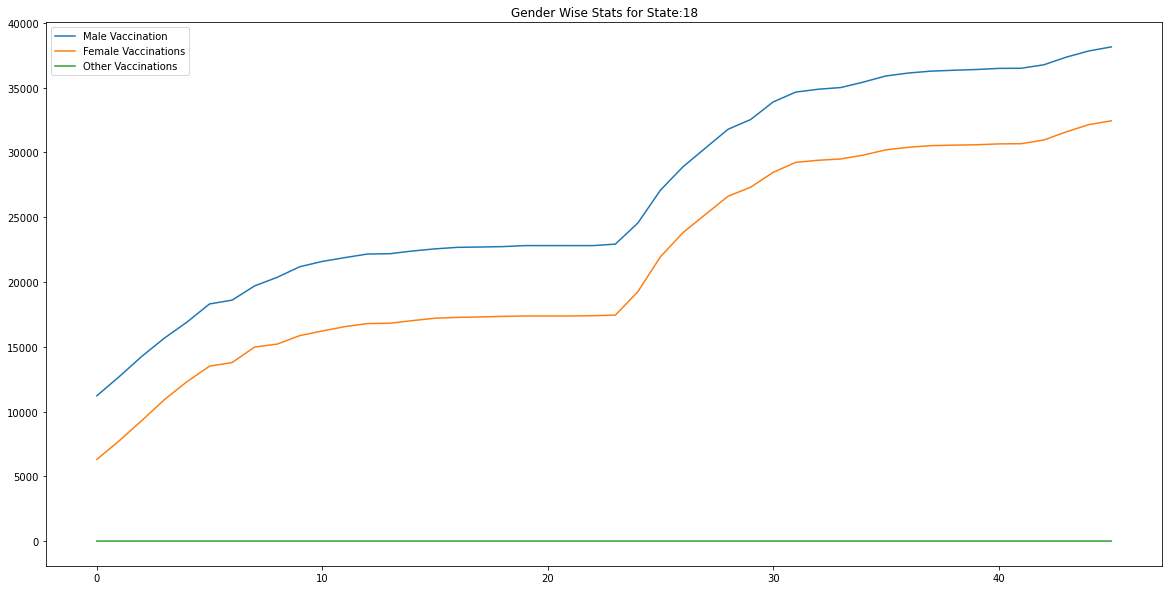

In [176]:
def get_district_changes(district_code, state_code):
    df, df_district = get_state_dfs(state_code)
    df_some_district = df_district.loc[df_district['district_id'] == district_code]
    return df_some_district

def plot_district_changes(district_code, state_code):
    plt.figure(figsize=(20,10))
    df_some_district = get_district_changes(district_code, state_code)
    plt.plot(df_some_district['vaccinatated_in_district_partial_and_total'], label = 'All Vaccinations')
    plt.plot(df_some_district['vaccinatated_in_district_total'], label = 'Completed Vaccinations')
    plt.plot(df_some_district['vaccinatated_in_district_partial'], label = 'Partial Vaccinations')
    plt.legend()
    plt.title(f'Vaccination Curves for District Number {district_code}')
    
def plot_genderwise_state(state_code):
    df, df_district = get_state_dfs(state_code)
    plt.figure(figsize=(20,10))
    plt.plot(df['vacc_male'], label = 'Male Vaccination')
    plt.plot(df['vacc_female'], label = 'Female Vaccinations')
    plt.plot(df['vacc_others'], label = 'Other Vaccinations')
    plt.title(f'Gender Wise Stats for State:{state_code}')
    plt.legend()

def plot_dosewise_state(state_code):
    df, df_district = get_state_dfs(state_code)
    plt.figure(figsize=(20,10))
    plt.plot(df['total_dose_1'], label = 'Total Dose 1')
    plt.plot(df['total_dose_2'], label = 'Total Dose 2')
    plt.plot(df['total_doses'], label = 'Total Doses')
    plt.legend()
    plt.title(f'Dose Wise Stats for State:{state_code}')
    
def plot_site_stats(state_code):
    plt.figure(figsize=(20,10))
    plt.plot(df['total_sites'], label = 'Total Sites')
    plt.plot(df['govt_sites'], label = 'Government Sites')
    plt.plot(df['pvt_sites'], label = 'Private Sites')
    plt.legend()
    plt.title(f'Site wise Stats for State:{state_code}')
plot_genderwise_state(18)

In [169]:
for key in ls[1].keys():
    print(key, ls[1][key])
    print()

topBlock {'sites': {'total': 1144, 'govt': 760, 'pvt': 384, 'today': None}, 'sessions': {'total': 163150, 'govt': 100200, 'pvt': 62950, 'today': None}, 'registration': {'total': None, 'male': None, 'female': None, 'others': None, 'today': None}, 'vaccination': {'total': 788948, 'male': 364689, 'female': 424140, 'others': 119, 'covishield': 781675, 'covaxin': 7220, 'today': 45935, 'tot_dose_1': 511728, 'tot_dose_2': 277220, 'total_doses': 1066168}}

vaccinationDoneByTime [{'ts': '2021-03-09T09:00:00.000Z', 'timestamps': '2021-03-09T15:00:00.000Z', 'label': '15:00-16:00', 'count': 6126, 'dose_one': 4013, 'dose_two': 2113}, {'ts': '2021-03-09T07:00:00.000Z', 'timestamps': '2021-03-09T13:00:00.000Z', 'label': '13:00-14:00', 'count': 7279, 'dose_one': 5577, 'dose_two': 1702}, {'ts': '2021-03-09T10:00:00.000Z', 'timestamps': '2021-03-09T16:00:00.000Z', 'label': '16:00-17:00', 'count': 6861, 'dose_one': 4597, 'dose_two': 2264}, {'ts': '2021-03-09T06:00:00.000Z', 'timestamps': '2021-03-09T12:0